 # ポケモンの写真データ同期


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# 作業


(1026, 50, 50, 3)
(1026,)
(441, 50, 50, 3)
(441,)
Epoch 1/15
33/33 [==============================] - 44s 1s/step - loss: 2.5176 - accuracy: 0.1218 - val_loss: 2.1291 - val_accuracy: 0.2653
Epoch 2/15
33/33 [==============================] - 39s 1s/step - loss: 2.1809 - accuracy: 0.2398 - val_loss: 1.8201 - val_accuracy: 0.4263
Epoch 3/15
33/33 [==============================] - 41s 1s/step - loss: 1.7036 - accuracy: 0.4152 - val_loss: 1.4109 - val_accuracy: 0.5669
Epoch 4/15
33/33 [==============================] - 39s 1s/step - loss: 1.3278 - accuracy: 0.5906 - val_loss: 1.1154 - val_accuracy: 0.6757
Epoch 5/15
33/33 [==============================] - 40s 1s/step - loss: 1.0246 - accuracy: 0.6881 - val_loss: 0.9596 - val_accuracy: 0.7324
Epoch 6/15
33/33 [==============================] - 39s 1s/step - loss: 0.9006 - accuracy: 0.7329 - val_loss: 0.8670 - val_accuracy: 0.7234
Epoch 7/15
33/33 [==============================] - 39s 1s/step - loss: 0.7628 - accuracy: 0.7778 - val_loss: 

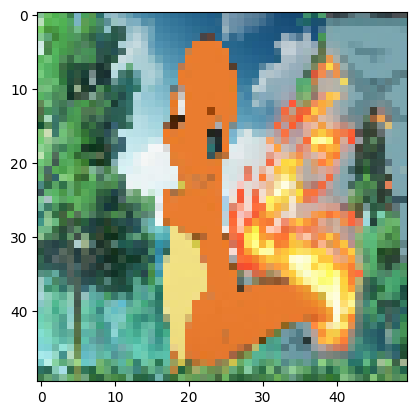

1/1 [==============================] - 0s 131ms/step
8カイリュー


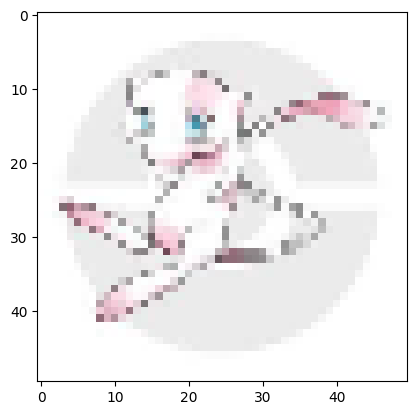

1/1 [==============================] - 0s 35ms/step
2ミュー


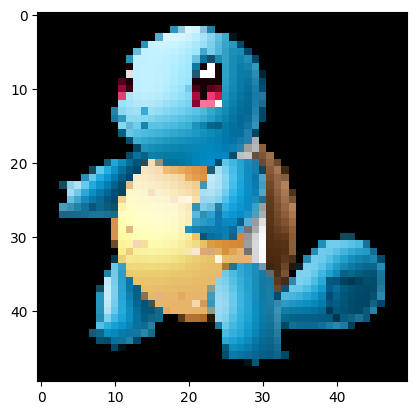

1/1 [==============================] - 0s 40ms/step
9ゼニガメ


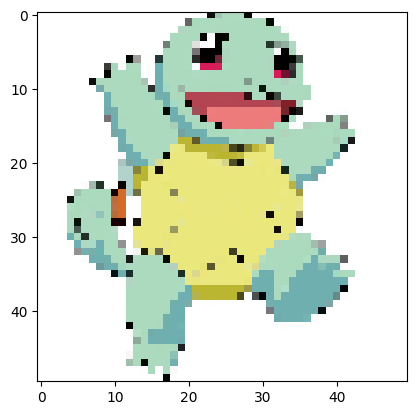

1/1 [==============================] - 0s 37ms/step
9ゼニガメ


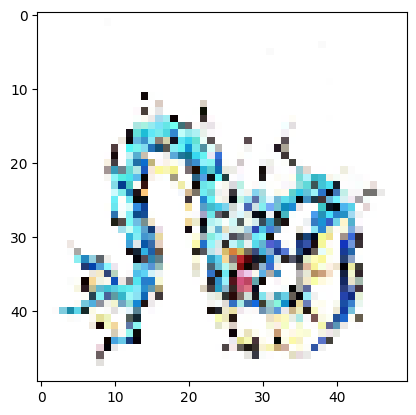

1/1 [==============================] - 0s 38ms/step
1ギャラドス


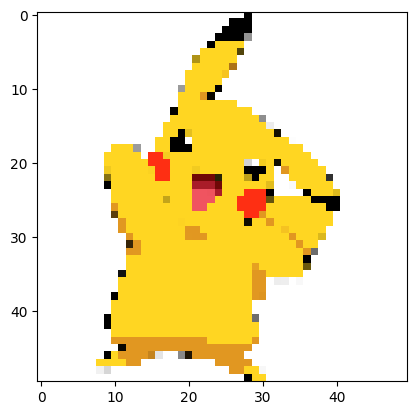

1/1 [==============================] - 0s 39ms/step
4ピカチュウ


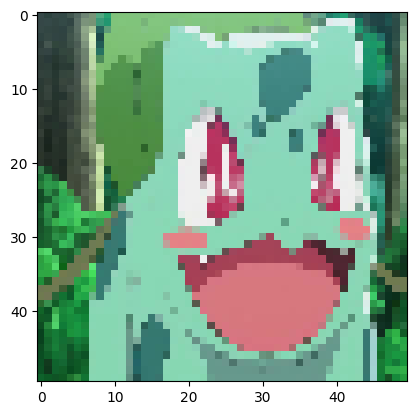

1/1 [==============================] - 0s 37ms/step
6フシギダネ


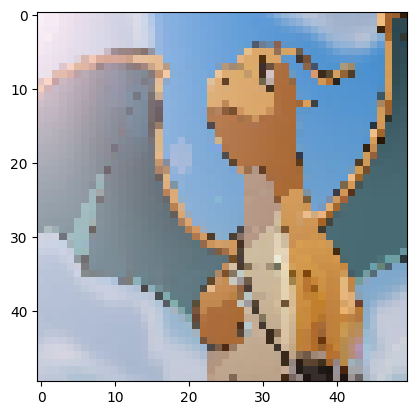

1/1 [==============================] - 0s 38ms/step
8カイリュー


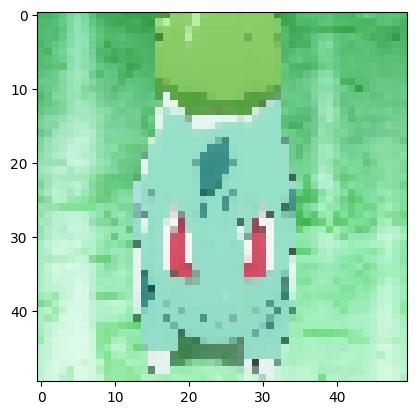

1/1 [==============================] - 0s 48ms/step
6フシギダネ


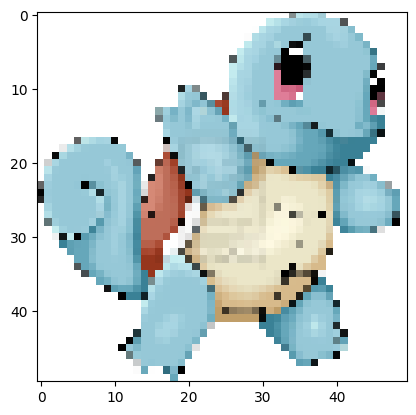

1/1 [==============================] - 0s 41ms/step
9ゼニガメ


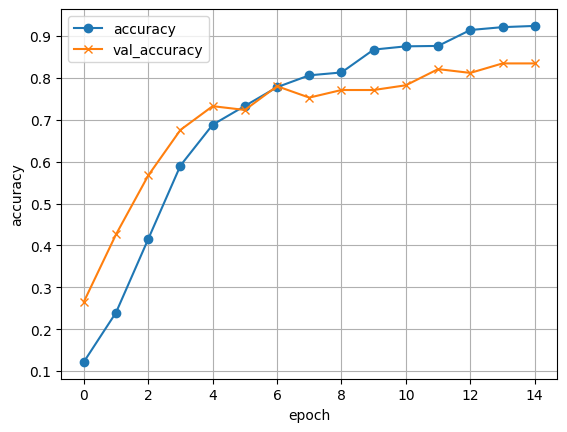

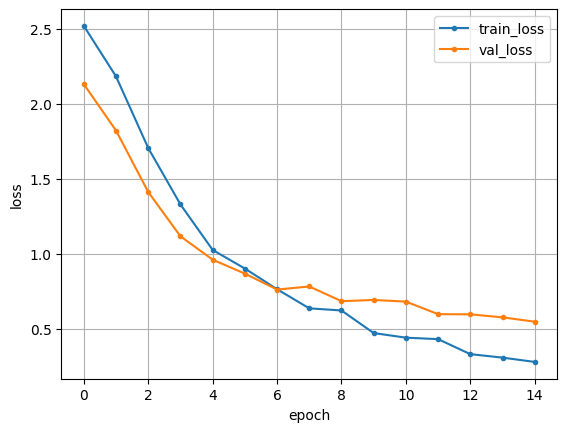

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import optimizers

# ポケモンの画像を取得
path_eevee = os.listdir("/content/drive/MyDrive/Colab_Notebooks/pokemon/Eevee/")
path_gyarados = os.listdir("/content/drive/MyDrive/Colab_Notebooks/pokemon/Gyarados/")
path_mew = os.listdir("/content/drive/MyDrive/Colab_Notebooks/pokemon/Mew/")
path_mew2 = os.listdir("/content/drive/MyDrive/Colab_Notebooks/pokemon/Mewtwo/")
path_pikachu = os.listdir("/content/drive/MyDrive/Colab_Notebooks/pokemon/Pikachu/")
path_charmander = os.listdir("/content/drive/MyDrive/Colab_Notebooks/pokemon/hitokage_Charmander/")
path_bulbasaur = os.listdir("/content/drive/MyDrive/Colab_Notebooks/pokemon/husigidane_Bulbasaur/")
path_snorlax = os.listdir("/content/drive/MyDrive/Colab_Notebooks/pokemon/kabigon_Snorlax/")
path_dragonite = os.listdir("/content/drive/MyDrive/Colab_Notebooks/pokemon/kairyu_Dragonite/")
path_squirtle = os.listdir("/content/drive/MyDrive/Colab_Notebooks/pokemon/zenigame_Squirtle/")

# ポケモンの画像を格納するリストを作成
img_eevee = []
img_gyarados = []
img_mew = []
img_mew2 = []
img_pikachu = []
img_charmander = []
img_bulbasaur = []
img_snorlax = []
img_dragonite = []
img_squirtle = []

for i in range(len(path_eevee)):
    path = "/content/drive/MyDrive/Colab_Notebooks/pokemon/Eevee/" + path_eevee[i]
    img = cv2.imread(path)
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    img = cv2.resize(img, (50,50))
    img_eevee.append(img)

for i in range(len(path_gyarados)):
    path = "/content/drive/MyDrive/Colab_Notebooks/pokemon/Gyarados/" + path_gyarados[i]
    img = cv2.imread(path)
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    img = cv2.resize(img, (50,50))
    img_gyarados.append(img)

for i in range(len(path_mew)):
    path = "/content/drive/MyDrive/Colab_Notebooks/pokemon/Mew/" + path_mew[i]
    img = cv2.imread(path)
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    img = cv2.resize(img, (50,50))
    img_mew.append(img)

for i in range(len(path_mew2)):
    path = "/content/drive/MyDrive/Colab_Notebooks/pokemon/Mewtwo/" + path_mew2[i]
    img = cv2.imread(path)
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    img = cv2.resize(img, (50,50))
    img_mew2.append(img)

for i in range(len(path_pikachu)):
    path = "/content/drive/MyDrive/Colab_Notebooks/pokemon/Pikachu/" + path_pikachu[i]
    img = cv2.imread(path)
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    img = cv2.resize(img, (50,50))
    img_pikachu.append(img)

for i in range(len(path_charmander)):
    path = "/content/drive/MyDrive/Colab_Notebooks/pokemon/hitokage_Charmander/" + path_charmander[i]
    img = cv2.imread(path)
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    img = cv2.resize(img, (50,50))
    img_charmander.append(img)

for i in range(len(path_bulbasaur)):
    path = "/content/drive/MyDrive/Colab_Notebooks/pokemon/husigidane_Bulbasaur/" + path_bulbasaur[i]
    img = cv2.imread(path)
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    img = cv2.resize(img, (50,50))
    img_bulbasaur.append(img)

for i in range(len(path_snorlax)):
    path = "/content/drive/MyDrive/Colab_Notebooks/pokemon/kabigon_Snorlax/" + path_snorlax[i]
    img = cv2.imread(path)
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    img = cv2.resize(img, (50,50))
    img_snorlax.append(img)

for i in range(len(path_dragonite)):
    path = "/content/drive/MyDrive/Colab_Notebooks/pokemon/kairyu_Dragonite/" + path_dragonite[i]
    img = cv2.imread(path)
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    img = cv2.resize(img, (50,50))
    img_dragonite.append(img)

for i in range(len(path_squirtle)):
    path = "/content/drive/MyDrive/Colab_Notebooks/pokemon/zenigame_Squirtle/" + path_squirtle[i]
    img = cv2.imread(path)
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    img = cv2.resize(img, (50,50))
    img_squirtle.append(img)


# np.arrayでXに学習画像、yに正解ラベルを代入
X = np.array(img_eevee + img_gyarados + img_mew + img_mew2 + img_pikachu + img_charmander + img_bulbasaur + img_snorlax + img_dragonite + img_squirtle)
y = np.array([0]*len(img_eevee) + [1]*len(img_gyarados) + [2]*len(img_mew) + [3]*len(img_mew2) + [4]*len(img_pikachu) + [5]*len(img_charmander) + [6]*len(img_bulbasaur) + [7]*len(img_snorlax) + [8]*len(img_dragonite) + [9]*len(img_squirtle) )

# 配列のラベルをシャッフルする
rand_index = np.random.permutation(np.arange(len(X)))
X = X[rand_index]
y = y[rand_index]

# 学習データと検証データを用意
X_train = X[:int(len(X)*0.7)]
y_train = y[:int(len(y)*0.7)]
X_test = X[int(len(X)*0.7):]
y_test = y[int(len(y)*0.7):]

# データの正規化
X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# 正解ラベルをone-hotの形にする
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test,  num_classes=10)

# モデルにvgg16を使用
input_tensor = Input(shape=(50, 50, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

# vggのoutputを受け取り、クラス分類する層を定義
# 中間層をいくつか定義
top_model = Sequential()
top_model.add(Flatten(input_shape=vgg16.output_shape[1:]))
top_model.add(Dense(256, activation='sigmoid'))
top_model.add(Dropout(0.5))
top_model.add(Dense(10, activation='softmax'))

# vggと、top_modelを連結
model = Model(vgg16.inputs, top_model(vgg16.output))

# vggの層の重みを変更不能にする。
for layer in model.layers[:15]:
    layer.trainable = False

# コンパイルの実行
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(learning_rate=1e-3, momentum=0.9),
              metrics=['accuracy'])

# 学習の実行
history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_test, y_test))

scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# モデルの予測
for i in range(10):
    x = X_test[i]
    plt.imshow(x)
    plt.show()
    pred = np.argmax(model.predict(x.reshape(1,50,50,3)))
    if pred == 0:
      print(str(pred) + "イーブイ")
    elif pred == 1:
      print(str(pred) + "ギャラドス")
    elif pred == 2:
      print(str(pred) + "ミュー")
    elif pred == 3:
      print(str(pred) + "ミューツー")
    elif pred == 4:
      print(str(pred) + "ピカチュウ")
    elif pred == 5:
      print(str(pred) + "ヒトカゲ")
    elif pred == 6:
      print(str(pred) + "フシギダネ")
    elif pred == 7:
      print(str(pred) + "カビゴン")
    elif pred == 8:
      print(str(pred) + "カイリュー")
    else:
      print(str(pred) + "ゼニガメ")

#正解率の結果プロット
plt.plot(history.history["accuracy"], label="accuracy", ls="-", marker="o")
plt.plot(history.history["val_accuracy"], label="val_accuracy", ls="-", marker="x")
plt.grid()
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

#損失関数の結果プロット
train_loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=len(train_loss)

plt.plot(range(epochs), train_loss, marker = '.', label = 'train_loss')
plt.plot(range(epochs), val_loss, marker = '.', label = 'val_loss')
plt.legend(loc = 'best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# モデルのデータ出力
from google.colab import files

# resultディレクトリを作成
result_dir = "result"
if not os.path.exists(result_dir):
  os.mkdir(result_dir)
# 学習したモデルを保存
model.save(os.path.join(result_dir, "model.h5"))

files.download("/content/result/model.h5")


In [ ]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
